**05-01 원-핫 인코딩**

**05-02 소프트맥스 회귀**

**05-03 소프트맥스 회귀의 비용 함수 구현하기**

In [2]:
import torch
import torch.nn.functional as F

torch.manual_seed(1)

z = torch.FloatTensor([1,2,3])

hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [3]:
hypothesis.sum()

tensor(1.)

In [4]:
z = torch.rand(3,5, requires_grad=True)

In [6]:
hypothesis = F.softmax(z, dim=1)
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


In [12]:
y = torch.randint(5,(3,)).long()
print(y)

tensor([3, 1, 2])


In [13]:
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1),1)

tensor([[0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.]])

In [15]:
print(y.unsqueeze(1))

tensor([[3],
        [1],
        [2]])


In [16]:
print(y_one_hot)

tensor([[0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.]])


In [17]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.5430, grad_fn=<MeanBackward0>)


In [18]:
y_one_hot.shape

torch.Size([3, 5])

In [20]:
F.nll_loss(F.log_softmax(z, dim=1),y)

tensor(1.5430, grad_fn=<NllLossBackward0>)

**05-04 소프트맥스 회귀 구현하기**

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)
print(x_train.shape)

torch.Size([8, 4])


In [24]:
y_one_hot = torch.zeros(8,3)
y_one_hot.scatter_(1, y_train.unsqueeze(1),1)
print(y_one_hot.shape)

torch.Size([8, 3])


In [26]:
#기본 소프트맥스 회귀
W = torch.zeros((4,3), requires_grad = True)
b = torch.zeros((1,3), requires_grad = True)

optimizer = optim.SGD([W,b], lr = 0.1)

nb_epochs = 1000
for epoch in range(nb_epochs +1):
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1)
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
    #cost = F.nll_loss(F.log_softmax(hypothesis), y)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.704199
Epoch  200/1000 Cost: 0.622999
Epoch  300/1000 Cost: 0.565717
Epoch  400/1000 Cost: 0.515291
Epoch  500/1000 Cost: 0.467661
Epoch  600/1000 Cost: 0.421278
Epoch  700/1000 Cost: 0.375402
Epoch  800/1000 Cost: 0.329766
Epoch  900/1000 Cost: 0.285072
Epoch 1000/1000 Cost: 0.248155


In [29]:
#F.cross_entropy 사용
W = torch.zeros((4,3), requires_grad = True)
b = torch.zeros((1,3), requires_grad = True)

optimizer = optim.SGD([W,b], lr = 0.1)

nb_epochs = 1000
for epoch in range(nb_epochs +1):
    #hypothesis = F.softmax(x_train.matmul(W) + b, dim=1)
    #cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.704199
Epoch  200/1000 Cost: 0.623000
Epoch  300/1000 Cost: 0.565717
Epoch  400/1000 Cost: 0.515291
Epoch  500/1000 Cost: 0.467662
Epoch  600/1000 Cost: 0.421278
Epoch  700/1000 Cost: 0.375402
Epoch  800/1000 Cost: 0.329766
Epoch  900/1000 Cost: 0.285073
Epoch 1000/1000 Cost: 0.248155


In [30]:
# nn.Module로 구현하기

#모델을 선언 및 초기화. 4새의 특성을 가지고 3개의 클래스로 분류
model = nn.Linear(4,3)

optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    prediction = model(x_train)
    cost = F.cross_entropy(prediction, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))


Epoch    0/1000 Cost: 1.616785
Epoch  100/1000 Cost: 0.658891
Epoch  200/1000 Cost: 0.573443
Epoch  300/1000 Cost: 0.518151
Epoch  400/1000 Cost: 0.473265
Epoch  500/1000 Cost: 0.433516
Epoch  600/1000 Cost: 0.396563
Epoch  700/1000 Cost: 0.360914
Epoch  800/1000 Cost: 0.325392
Epoch  900/1000 Cost: 0.289178
Epoch 1000/1000 Cost: 0.254148


In [31]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4,3)

    def forward(self, x):
        return self.linear(x)

model = SoftmaxClassifierModel()

optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs +1):
    prediction = model(x_train)
    cost = F.cross_entropy(prediction, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 2.637636
Epoch  100/1000 Cost: 0.647903
Epoch  200/1000 Cost: 0.564643
Epoch  300/1000 Cost: 0.511043
Epoch  400/1000 Cost: 0.467249
Epoch  500/1000 Cost: 0.428280
Epoch  600/1000 Cost: 0.391924
Epoch  700/1000 Cost: 0.356742
Epoch  800/1000 Cost: 0.321577
Epoch  900/1000 Cost: 0.285617
Epoch 1000/1000 Cost: 0.250818


**05-05 소프트맥스 회귀로 MNIST 데이터 분류하기**

In [33]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [34]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음기기로 학습합니다.", device)

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

training_epochs = 15
batch_size = 100

mnist_train = dsets.MNIST(root = 'MNIST_data/',
                          train = True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root = 'MNIST_data/',
                          train = False,
                          transform=transforms.ToTensor(),
                          download=True)

data_loader = DataLoader(dataset = mnist_train,
                         batch_size = batch_size,
                         shuffle = True,
                         drop_last = True)

다음기기로 학습합니다. cpu


100%|██████████| 9912422/9912422 [00:00<00:00, 336599101.70it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 29189323.81it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 190720076.02it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 6211453.79it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [36]:
linear = nn.Linear(784, 10, bias = True).to(device)

criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X,Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost/total_batch

    print('Epoch:', '%04d' % (epoch+1), 'cost = ', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost =  0.535150588
Epoch: 0002 cost =  0.359577775
Epoch: 0003 cost =  0.331264287
Epoch: 0004 cost =  0.316404670
Epoch: 0005 cost =  0.307107031
Epoch: 0006 cost =  0.300456554
Epoch: 0007 cost =  0.294933408
Epoch: 0008 cost =  0.290956199
Epoch: 0009 cost =  0.287074089
Epoch: 0010 cost =  0.284515619
Epoch: 0011 cost =  0.281914055
Epoch: 0012 cost =  0.279526889
Epoch: 0013 cost =  0.277636588
Epoch: 0014 cost =  0.275874764
Epoch: 0015 cost =  0.274422795
Learning finished


Accuracy: 0.8883000016212463
Label:  6
Prediction:  6


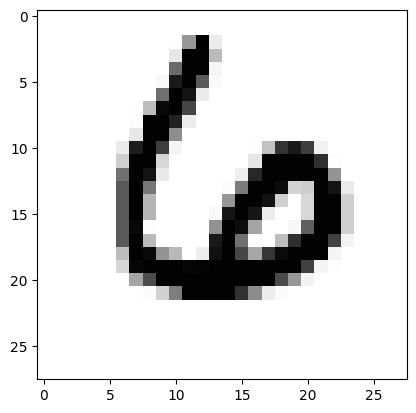

In [54]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28* 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    r = random.randint(0, len(mnist_test)-1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r +1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()